<a href="https://colab.research.google.com/github/Pedrobernabe1/MVPAnalisedeDadoseBoasPraticasPedroBernabe/blob/main/MVPPedrochimenti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP Análise de Dados e Boas Práticas
Nome: Pedro Chimenti Serrano Bernabe

Matrícula: 4052024002283

Dataset: Autompg-dataset

# Descrição do Problema
Analisando a estrutura dos seus dados (mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name), o objetivo principal é explorar diferentes aspectos do conjunto de dados, indo de análises de eficiência e performance até tendências temporais e geográficas

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name), o objetivo é prever algumas relações e previsões nao nitidas.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Qual é a relação entre o peso de um carro e seu consumo de combustível (MPG)?
- Existe uma correlação entre a potencia e a aceleração?

- Carros de qual origem (EUA, Europa ou Japão) apresentaram, em média, a melhor eficiência de combustível (MPG) durante este período?

- Existe uma correlação entre o número de cilindros e a aceleração do veículo?

- Quais são os 5 carros com a maior eficiência (MPG) e os 5 com a maior potência (horsepower) no dataset? Eles pertencem a alguma categoria específica (origem, ano, número de cilindros)?
- Como a potencia (horsepower) média dos carros evoluiu entre 1970 e 1982?

O dataset Auto contém 398 amostras. Possui oito atributos e o nome do carro:

- ***MPG*** (Consumo do veiculo)
- ***cylinders*** (Quantidade de cilindros)
- ***displacement*** (Deslocamento do cilindro)
- ***horsepower*** (Potencia em cavalos)
- ***weight*** (Peso do veiculo)
- ***acceleration*** (Aceleração do veículo)
- ***model year*** (Ano do modelo)
- ***origin*** (Origem do carro)

OBS:1 é um carro feito na América, 2 na Europa e 3 na Ásia ou outra parte do mundo
- ***Car Name*** (Nome do carro)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [62]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/autompg-dataset


In [63]:
# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv(f'{path}/auto-mpg.csv')

# Display the first 5 rows of the DataFrame
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [64]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 398

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


Nessa etapa de Análise Exploratória de Dados (EDA) com o dataset Iris, a ideia é entender como as variáveis se comportam, como se relacionam entre si e quais são suas principais características. Isso ajuda bastante nas próximas fases, como o pré-processamento e a criação dos modelos


In [65]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


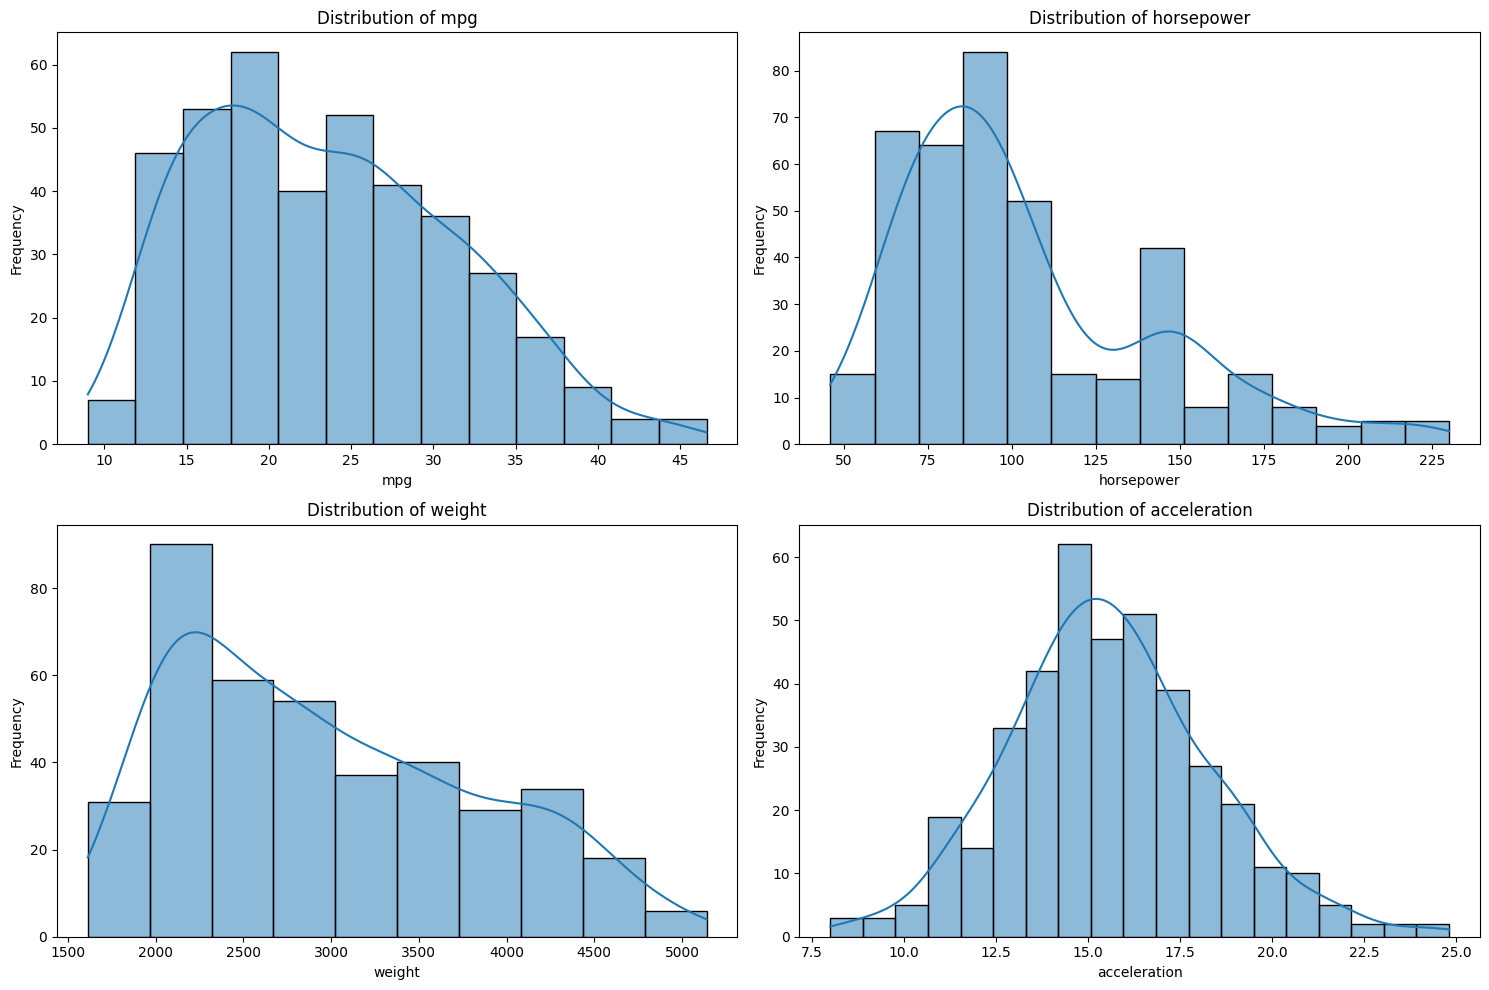

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key numerical columns to visualize their distributions
numerical_cols = ['mpg', 'horsepower', 'weight', 'acceleration']

# Create histograms for each selected numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Podemos verificar nos graficos que a distribuiçao dos dados sao normais.

##Apos isso na tentativa de fazer a padronização encontramos algumas celulas erradas impossibilitando termino da padronização, algumas celulas estão com ponto de interrogação "?".
##Vamos fazer a substituição desses dados errantes e depois iremos padronizar os dados

In [67]:
# valores faltantes ou nulos

print("\nValores ausentes antes do manuseio:")
print(df.isnull().sum())


Valores ausentes antes do manuseio:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [68]:
# Função para contar valores não numéricos em uma coluna
def count_non_numeric(series):
    return series[pd.to_numeric(series, errors='coerce').isna()].count()
for col in df.columns:
    non_numeric_count = count_non_numeric(df[col])
    if non_numeric_count > 0:
        print(f"Column '{col}': {non_numeric_count} non-numeric values")
    else:
        print(f"Column '{col}': 0 non-numeric values")

Column 'mpg': 0 non-numeric values
Column 'cylinders': 0 non-numeric values
Column 'displacement': 0 non-numeric values
Column 'horsepower': 6 non-numeric values
Column 'weight': 0 non-numeric values
Column 'acceleration': 0 non-numeric values
Column 'model year': 0 non-numeric values
Column 'origin': 0 non-numeric values
Column 'car name': 398 non-numeric values


# Vimos que na coluna de potencia(horsepower) existe pontos de interrogação "?"

##Vamos fazer uma analise do que podemos substituir os pontos de interrogação

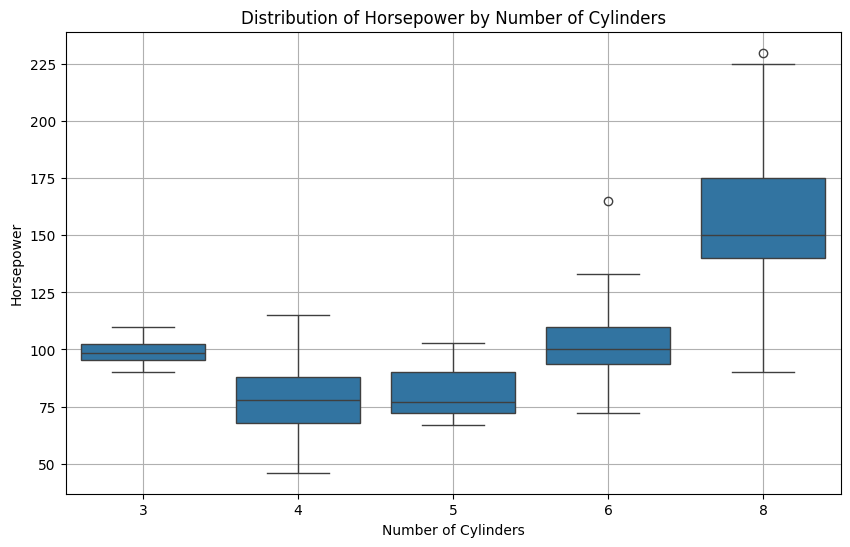

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of horsepower by number of cylinders using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='horsepower', data=df)
plt.title('Distribution of Horsepower by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Horsepower')
plt.grid(True)
plt.show()

Podemos ver que esta diretamente correlacionado a potencia com o numero de cilindro, entao no próximo passo iremos fazer uma limpeza para substituir os pontos de interrogação '?'.

# Limpeza
##Vamos preencher os valores ausentes representados por '?' na coluna 'horsepower'com a potência média para cada valor de cilindro correspondente.

Localize as linhas no DataFrame onde a coluna 'horsepower' contém '?'.

In [70]:
df_missing_horsepower = df[df['horsepower'] == '?']
display(df_missing_horsepower)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


##Converta a coluna 'horsepower' para um tipo numérico, convertendo os valores '?' para NaN.

In [71]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

##Verifique se há valores nulos na coluna 'horsepower' para confirmar a conversão e substituição de '?' por NaN.


In [72]:
print("Valores nulos por coluna após conversão de 'potência' em numérico:")
display(df.isnull().sum())

Valores nulos por coluna após conversão de 'potência' em numérico:


,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


##Calcule a potência média para cada grupo de cilindros, ignorando os valores de NaN.


In [73]:
median_horsepower_by_cylinders = df.groupby('cylinders')['horsepower'].median()
display(median_horsepower_by_cylinders)

,horsepower
cylinders,
3,98.5
4,78.0
5,77.0
6,100.0
8,150.0


## Preencha os valores NaN na coluna "horsepower" com a potência média calculada com base no valor do cilindro correspondente.

In [74]:
df['horsepower'] = df.apply(lambda row: median_horsepower_by_cylinders[row['cylinders']] if pd.isna(row['horsepower']) else row['horsepower'], axis=1)

##Exiba o DataFrame atualizado e verifique se há valores nulos na coluna 'horsepower' para verificar se os valores ausentes foram preenchidos.



In [75]:
display(df.head())
print("\nValores nulos por coluna após preencher valores de 'potência' ausentes:")
display(df.isnull().sum())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino



Valores nulos por coluna após preencher valores de 'potência' ausentes:


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


##Verificar se há valores '?' ou NaN na coluna 'horsepower' e exibir o DataFrame atualizado para confirmar se os valores ausentes foram tratados.

In [76]:
print("Número de valores '?' em 'horsepower'':", df[df['horsepower'] == '?'].shape[0])

print("Número de valores 'NaN' em 'horsepower'':", df['horsepower'].isnull().sum())

display(df.head())

Número de valores '?' em 'horsepower'': 0
Número de valores 'NaN' em 'horsepower'': 0


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


#Padronização

In [77]:
# Separar features (X) e target (y)
X = df.drop('car name', axis=1)
y = df['car name']

In [78]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (278, 8)
Dimensões de X_test: (120, 8)
Dimensões de y_train: (278,)
Dimensões de y_test: (120,)


In [80]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [81]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [82]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [83]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -1.068860   1.508730      1.533381    1.149682  1.742273     -0.594573   
1 -0.309615  -0.874378     -0.536489   -0.855616 -0.715662      1.398199   
2 -0.309615   0.317176      0.054902   -0.498508 -0.491446      0.130071   
3 -0.372886   0.317176      0.054902   -0.223810  0.193255      0.927180   
4 -0.309615   0.317176      0.045046   -0.361159 -0.417913     -0.232251   

   model year    origin  
0   -0.311409 -0.705114  
1   -0.875395 -0.705114  
2   -1.721374 -0.705114  
3    0.534569 -0.705114  
4   -1.721374 -0.705114  


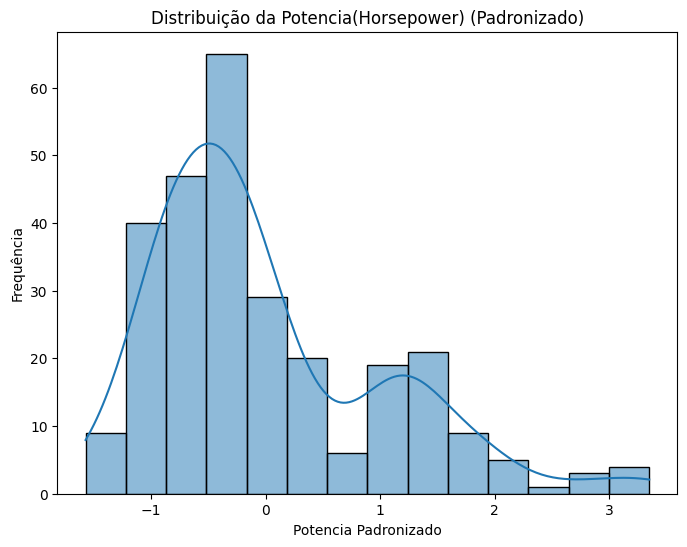

In [84]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['horsepower'], kde=True)
plt.title('Distribuição da Potencia(Horsepower) (Padronizado)')
plt.xlabel('Potencia Padronizado')
plt.ylabel('Frequência')
plt.show()

##Com o gráfico de distribuição da potência padronizada, podemos analisar a forma da distribuição após a padronização. Idealmente, após a padronização com StandardScaler, a distribuição de uma variável numérica deve ter média próxima de 0 e desvio padrão próximo de 1.
##Em resumo, o gráfico nos ajuda a confirmar que a padronização foi aplicada corretamente (os dados estão centralizados em torno de zero e com uma escala reduzida) e a entender a forma da distribuição da potência em sua nova escala.

#Analise das perguntas
A seguir iremos gerar alguns graficos e explicaremos cada um para uma tentativa de resposta das perguntas iniciais.

##Pergunta 1
Qual é a relação entre o peso de um carro e seu consumo de combustível (MPG)?

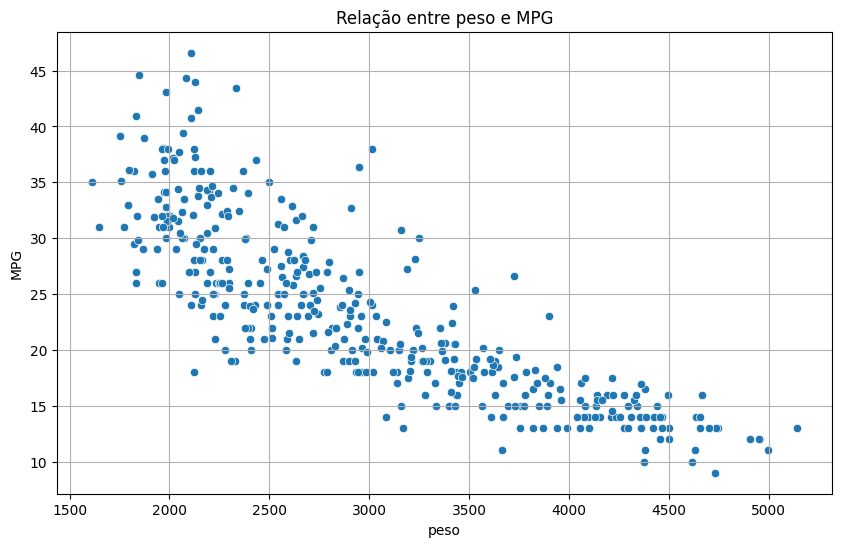

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar um gráfico de dispersão de peso vs mpg
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title('Relação entre peso e MPG')
plt.xlabel('peso')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

##Pelo gráfico, parece haver uma forte correlação negativa entre peso e consumo de combustível (MPG). À medida que o peso do carro aumenta, o MPG geralmente diminui. Isso faz sentido intuitivamente, já que carros mais pesados ​​geralmente requerem mais combustível para se mover.

##Pergunta 2
Existe uma correlação entre a potencia e a aceleração?

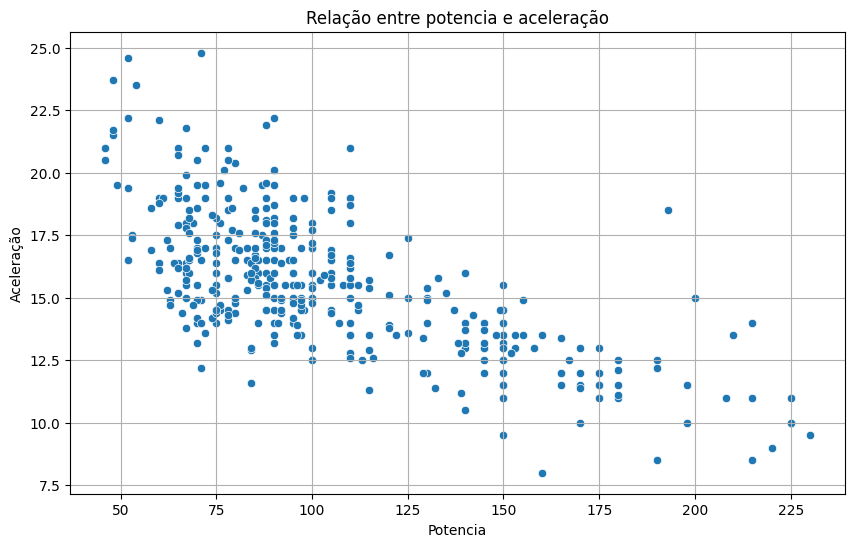

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar um gráfico de dispersão de potência versus aceleração
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='acceleration', data=df)
plt.title('Relação entre potencia e aceleração')
plt.xlabel('Potencia')
plt.ylabel('Aceleração')
plt.grid(True)
plt.show()

##A partir deste gráfico, parece haver uma tendência geral em que valores mais altos de potência tendem a estar associados a valores mais baixos de aceleração (ou seja, aceleração mais rápida). Isso faz sentido, já que motores mais potentes geralmente resultam em aceleração mais rápida. No entanto, a relação não parece tão linear quanto a relação entre peso e consumo de combustível (MPG), com maior dispersão nos pontos de dados.

#Pergunta 3
Carros de qual origem (EUA, Europa ou Japão) apresentaram, em média, a melhor eficiência de combustível (MPG) durante este período?

Média de MPG por origem:
origin_name
Japan     30.450633
Europe    27.891429
USA       20.083534
Name: mpg, dtype: float64

A origem com a melhor eficiência de combustível (MPG) média é: Japan (30.45 MPG)


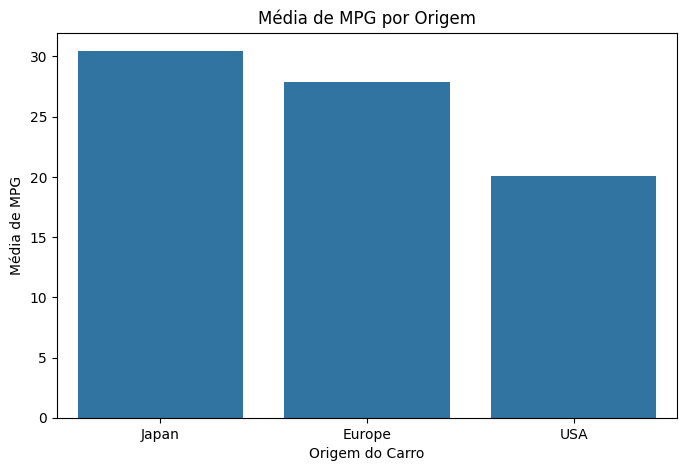

In [87]:
#Carros de qual origem (EUA, Europa ou Japão) apresentaram, em média, a melhor eficiência de combustível (MPG) durante este período?

# Mapear códigos numéricos de 'origem' para nomes categóricos
origin_map = {1: 'USA', 2: 'Europe', 3: 'Japan'}
df['origin_name'] = df['origin'].map(origin_map)

# Calcular o MPG médio para cada origem
average_mpg_by_origin = df.groupby('origin_name')['mpg'].mean().sort_values(ascending=False)

print("Média de MPG por origem:")
print(average_mpg_by_origin)

# Identifique a origem com a melhor média de MPG
best_origin = average_mpg_by_origin.index[0]
best_mpg = average_mpg_by_origin.iloc[0]

print(f"\nA origem com a melhor eficiência de combustível (MPG) média é: {best_origin} ({best_mpg:.2f} MPG)")

# Visualize o MPG médio por origem
plt.figure(figsize=(8, 5))
sns.barplot(x=average_mpg_by_origin.index, y=average_mpg_by_origin.values)
plt.title('Média de MPG por Origem')
plt.xlabel('Origem do Carro')
plt.ylabel('Média de MPG')
plt.show()

##Com base na análise, os carros japoneses apresentaram, em média, a melhor eficiência de combustível (MPG) durante o período, com uma média de MPG de aproximadamente 30,45. Os carros europeus ficaram em segundo lugar, e os carros dos EUA apresentaram a menor média de MPG.

#Pergunta 4
Existe uma correlação entre o número de cilindros e a aceleração do veículo?

Média de Aceleração por Número de Cilindros:
cylinders
8    12.955340
3    13.250000
6    16.263095
4    16.601471
5    18.633333
Name: acceleration, dtype: float64


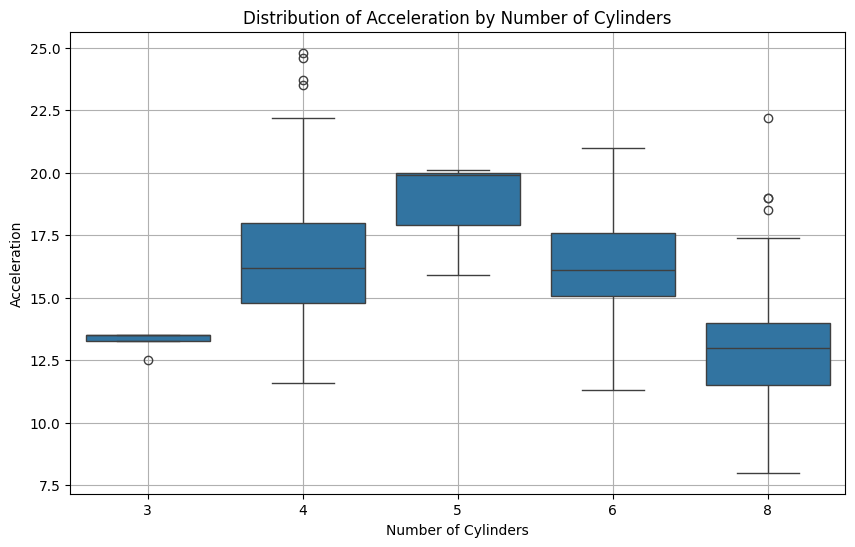

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule a aceleração média para cada número de cilindros
average_acceleration_by_cylinders = df.groupby('cylinders')['acceleration'].mean().sort_values()

print("Média de Aceleração por Número de Cilindros:")
print(average_acceleration_by_cylinders)

# Visualize a distribuição da aceleração para cada número de cilindros usando um gráfico de caixa
plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='acceleration', data=df)
plt.title('Distribution of Acceleration by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Acceleration')
plt.grid(True)
plt.show()

##O gráfico de caixa mostra a distribuição dos valores de aceleração para cada número de cilindros. A aceleração média impressa por número de cilindros também corrobora essa observação, com carros de 8 cilindros apresentando a menor aceleração média (mais rápida) e carros de 5 cilindros apresentando a maior aceleração média (mais lenta).

#Pergunta 5
Quais são os 5 carros com a maior eficiência (MPG) e os 5 com a maior potência (horsepower) no dataset? Eles pertencem a alguma categoria específica (origem, ano, número de cilindros)?

In [89]:
# Gere o top 5 carros com maior MPG
top_5_mpg = df.sort_values(by='mpg', ascending=False).head(5)

print("Top 5 carros com maior MPG:")
display(top_5_mpg[['car name', 'mpg', 'origin_name', 'model year', 'cylinders']])

# Gere o Top 5 carros com maior potencia
top_5_horsepower = df.sort_values(by='horsepower', ascending=False).head(5)

print("\nTop 5 carros com maior potencia:")
display(top_5_horsepower[['car name', 'horsepower', 'origin_name', 'model year', 'cylinders']])

Top 5 carros com maior MPG:


,car name,mpg,origin_name,model year,cylinders
322,mazda glc,46.6,Japan,80,4
329,honda civic 1500 gl,44.6,Japan,80,4
325,vw rabbit c (diesel),44.3,Europe,80,4
394,vw pickup,44.0,Europe,82,4
326,vw dasher (diesel),43.4,Europe,80,4



Top 5 carros com maior potencia:


,car name,horsepower,origin_name,model year,cylinders
116,pontiac grand prix,230.0,USA,73,8
8,pontiac catalina,225.0,USA,70,8
13,buick estate wagon (sw),225.0,USA,70,8
95,buick electra 225 custom,225.0,USA,73,8
6,chevrolet impala,220.0,USA,70,8


##Os 5 carros com melhor consumo de combustível: Esses carros geralmente apresentam valores altos de consumo de combustível, são principalmente do Japão e da Europa, tendem a ter 4 cilindros e são de modelos de anos posteriores no conjunto de dados (por volta de 1980-1982). Isso se alinha com nossa descoberta anterior de que carros japoneses e europeus tinham melhor consumo médio de combustível e com a tendência geral de aumento da eficiência de combustível ao longo do tempo.
##Os 5 carros com melhor consumo de combustível: Esses carros têm valores de potência muito altos, são exclusivamente dos EUA, têm 8 cilindros e são de modelos de anos anteriores (por volta de 1970-1973). Isso faz sentido, visto que os carros americanos anteriores eram geralmente maiores, com motores mais potentes, e 8 cilindros são normalmente associados a maior potência.

#Pergunta 6
Como a potencia (horsepower) média dos carros evoluiu entre 1970 e 1982?

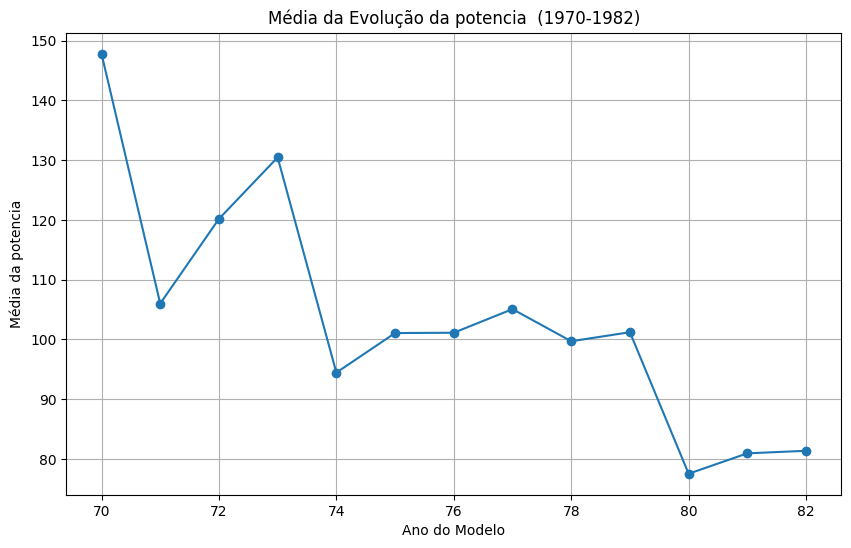

In [90]:
# Calcule a potência média para cada ano do modelo
average_horsepower_by_year = df.groupby('model year')['horsepower'].mean()

# Trace a potência média ao longo dos anos do modelo
plt.figure(figsize=(10, 6))
average_horsepower_by_year.plot(kind='line', marker='o')
plt.title('Média da Evolução da potencia  (1970-1982)')
plt.xlabel('Ano do Modelo')
plt.ylabel('Média da potencia')
plt.grid(True)
plt.show()

No gráfico, podemos observar uma tendência geral: a potência média parece diminuir ao longo desse período, embora haja algumas flutuações ano a ano. Há uma queda perceptível na potência média após o início da década de 1970.